In [63]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Forecast as fc

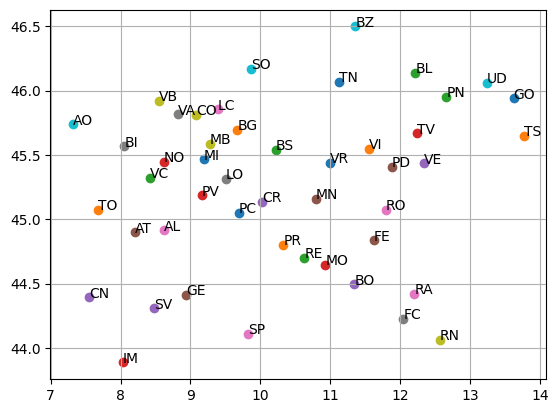

In [61]:
# loading data

provinces = pd.read_csv('..\data\dati-province\dpc-covid19-ita-province.csv')
today = '2021-06-26T17:00:00'
today_data = provinces.loc[provinces['data']==today]

population = pd.read_csv('..\data\Popolazione_province.csv', index_col=0)

p_list = pd.read_csv('..\data\Provinces_list.csv')['Sigla'].tolist()

x = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['long'].values
y = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['lat'].values
sigla = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['sigla_provincia'].values
z = today_data.loc[today_data['sigla_provincia'].isin(p_list)]['totale_casi'].values

n_points = x.shape[0]

plt.figure()
for i in range(n_points):
    plt.scatter(x[i], y[i])
    plt.text(x[i], y[i], sigla[i])
plt.grid(True)



In [ ]:
# Extracting data for each province
df_list = []
for pr in p_list:
    df_list.append(provinces.loc[provinces['sigla_provincia']==pr])

n_days = df_list[0]['totale_casi'].values.shape[0]
new_pos_dict = {}

# index = p_list.index('BO')

for index, sigla in enumerate(p_list):
    plt.figure()
    plt.title(sigla)
    my_data = df_list[index]
    pos_tot = my_data['totale_casi'].values/population['Residenti'][sigla]*100000
    new_pos = pos_tot.copy()
    new_pos[1:] = (pos_tot[1:]-pos_tot[:-1])
    new_pos_dict.update({sigla: new_pos})
    plt.plot(new_pos, label=sigla)
    plt.grid(True)

In [99]:
# Fitting data with Forecast class

waves_dict = {}

for index, sigla in enumerate(p_list):
    print('Fitting for: '+sigla)
    new_pos_tot = new_pos_dict[sigla]

    t0=14
    T=new_pos_tot.shape[0]
    tt_forecast = np.arange(t0,T)
    rt_list = []

    my_prediction = np.zeros(T-t0)

    Forecast = fc.n_waves(new_pos_tot,window=7)
    fit_data = np.zeros(T)
    for t in tt_forecast:
        fit_data[t] = Forecast.daily_update()
        rt_list.append(Forecast.rt)
        my_prediction[t-t0] = Forecast.predict(t+1)

    waves_dict.update({sigla: Forecast.L_waves})



Fitting for: BO


c:\Users\adria\OneDrive - Politecnico di Milano\adriano\politecnico\Mathematical Engineering\Advanced Mathematical Modelling\Projects\Wave\script\Forecast.py:29: RuntimeWarning: divide by zero encountered in log
  log_data = np.log(data)
c:\Users\adria\OneDrive - Politecnico di Milano\adriano\politecnico\Mathematical Engineering\Advanced Mathematical Modelling\Projects\Wave\script\Forecast.py:32: RuntimeWarning: invalid value encountered in scalar subtract
  rt[i] = log_data[i+1]-log_data[i]


Fitting for: FE


c:\Users\adria\OneDrive - Politecnico di Milano\adriano\politecnico\Mathematical Engineering\Advanced Mathematical Modelling\Projects\Wave\script\Forecast.py:29: RuntimeWarning: invalid value encountered in log
  log_data = np.log(data)


Fitting for: FC
Fitting for: MO
Fitting for: PR
Fitting for: PC
Fitting for: RA


C:\Users\adria\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Fitting for: RE
Fitting for: RN
Fitting for: GO
Fitting for: PN
Fitting for: TS
Fitting for: UD
Fitting for: GE
Fitting for: IM
Fitting for: SP
Fitting for: SV
Fitting for: BG
Fitting for: BS
Fitting for: CO
Fitting for: CR
Fitting for: LC
Fitting for: LO
Fitting for: MN
Fitting for: MI
Fitting for: MB
Fitting for: PV
Fitting for: SO
Fitting for: VA
Fitting for: AL
Fitting for: AT
Fitting for: BI
Fitting for: CN
Fitting for: NO
Fitting for: TO
Fitting for: VB
Fitting for: VC
Fitting for: BZ
Fitting for: TN
Fitting for: AO
Fitting for: BL
Fitting for: PD
Fitting for: RO
Fitting for: TV
Fitting for: VE
Fitting for: VR
Fitting for: VI


In [103]:
import pickle

# Save the dictionary to a file using pickle
with open('..\data\provinces_waves.pickle', 'wb') as file:
    pickle.dump(waves_dict, file)

In [105]:
# Load the dictionary from the file
with open('..\data\provinces_waves.pickle', 'rb') as file:
    loaded_data = pickle.load(file)
print(loaded_data['BO'])

[<Forecast.wave_fit object at 0x000001E214C07EB0>, <Forecast.wave_fit object at 0x000001E20C932080>, <Forecast.wave_fit object at 0x000001E20C930040>, <Forecast.wave_fit object at 0x000001E209863100>, <Forecast.wave_fit object at 0x000001E210B3A5C0>, <Forecast.wave_fit object at 0x000001E20C612E00>, <Forecast.wave_fit object at 0x000001E210A85B10>, <Forecast.wave_fit object at 0x000001E20996ACB0>, <Forecast.wave_fit object at 0x000001E20996A950>, <Forecast.wave_fit object at 0x000001E209969510>, <Forecast.wave_fit object at 0x000001E20A28B310>, <Forecast.wave_fit object at 0x000001E20A2897E0>, <Forecast.wave_fit object at 0x000001E209905000>, <Forecast.wave_fit object at 0x000001E20998F070>, <Forecast.wave_fit object at 0x000001E20998DCC0>, <Forecast.wave_fit object at 0x000001E20CC8FEE0>, <Forecast.wave_fit object at 0x000001E211093730>, <Forecast.wave_fit object at 0x000001E211093DC0>, <Forecast.wave_fit object at 0x000001E20C8118D0>, <Forecast.wave_fit object at 0x000001E20C812C20>,

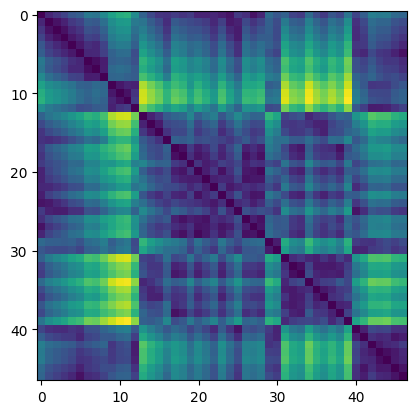

In [11]:
# Distance matrix

D = np.zeros((n_points,n_points))
for i in range(n_points):
    for j in range(i+1,n_points):
        D[i,j]=((x[j]-x[i])**2 + (y[j]-y[i])**2)**0.5
        D[j,i]=D[i,j]

plt.figure()
plt.imshow(D)

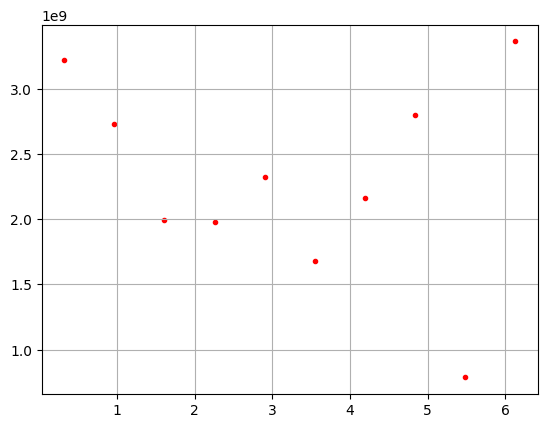

In [12]:
# Distance bins and empirical variograms

D_max = np.amax(D)
n_bins = 10
bin_edges = np.linspace(0,D_max,n_bins+1)
bin_width = bin_edges[1]-bin_edges[0]
bin_centers = np.linspace(bin_width/2,D_max-bin_width/2, n_bins)
bins = []
for k in range(n_bins):
    bin_k = []
    for i in range(n_points):
        for j in range(i+1, n_points):
            if D[i,j]>bin_edges[k] and D[i,j]<=bin_edges[k+1]:
                bin_k.append((i,j))
    bins.append(bin_k)
            
gamma = np.zeros(n_bins)
for k in range(n_bins):
    sum = 0
    for s in range(len(bins[k])):
        i = bins[k][s][0]
        j = bins[k][s][1]
        sum += (z[i]-z[j])**2
    gamma[k]=1/(2*len(bins[k]))*sum

plt.figure()
for k in range(n_bins):
    plt.scatter(bin_centers[k], gamma[k], color='red', marker='.')
plt.grid(True)